In [27]:
## 기본 패키지 모음
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
## 전처리 및 모델링 준비를 위한 패키지
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
 
## 실제 모델링을 위한 패키지
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
 
## 모델 평가를 위한 패키지
from sklearn.metrics import classification_report
from sklearn import metrics

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
    
red_wine_quality = pd.read_csv("/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv")
red_wine_quality.head(5)

/kaggle/input/red-wine-quality-cortez-et-al-2009/winequality-red.csv


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
print(f"the red_wine_quality shape is: {red_wine_quality.shape}")
print("")
print(red_wine_quality.head())
print("")
print(red_wine_quality.columns)

the red_wine_quality shape is: (1599, 12)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  

In [20]:
x = red_wine_quality["pH"].values
y = red_wine_quality["quality"].values

print("The x variable is:", x)
print("")
print("The y variable is:", y)
print("")
print("The shape of x is:", x.shape)
print("The shape of y is:", y.shape)

The x variable is: [3.51 3.2  3.26 ... 3.42 3.57 3.39]

The y variable is: [5 5 5 ... 6 5 6]

The shape of x is: (1599,)
The shape of y is: (1599,)


In [22]:
print(type(x))
x = x.reshape(-1, 1)
print(x)
print("")
print("the shape of x is:", x.shape)

<class 'numpy.ndarray'>
[[3.51]
 [3.2 ]
 [3.26]
 ...
 [3.42]
 [3.57]
 [3.39]]

the shape of x is: (1599, 1)


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)
print(f"x_train shape {x_train.shape}")
print(f"y_train shape {y_train.shape}")
print("")
print(f"x_test shape {x_test.shape}")
print(f"y_test shape {y_test.shape}")
print("")

x_train shape (1119, 1)
y_train shape (1119,)

x_test shape (480, 1)
y_test shape (480,)



In [24]:
print(len(train_test_split(x, y, train_size=0.8, test_size=0.2, random_state=100)))

4


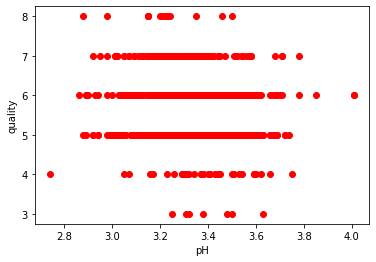

In [30]:
plt.scatter(x_train, y_train, color='red')
plt.xlabel("pH")
plt.ylabel("quality")
plt.show()

In [31]:
# This our instance of a LinearRegression class
lm = LinearRegression()

# Invoke lm.fit(), passing in training data
# This creates the 'best fit line' for our TRAINING data points 
lm.fit(x_train, y_train)


# Then we have a model! We have a formula. We have a line that will predict quality given pH
# Then we test the best fit line, by invoking .predict() on our testing data
# y_predict represents PREDICTIONS from our linear regression!
# lm.score() -> Returns the coefficient of determination (R^2). A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model.
y_predict = lm.predict(x_test)

print(f"Train Accuracy {lm.score(x_train, y_train)}")
print(f"Test Accuracy {lm.score(x_test, y_test)}")

Train Accuracy 0.0033538148868147433
Test Accuracy 0.0029189144565353597


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

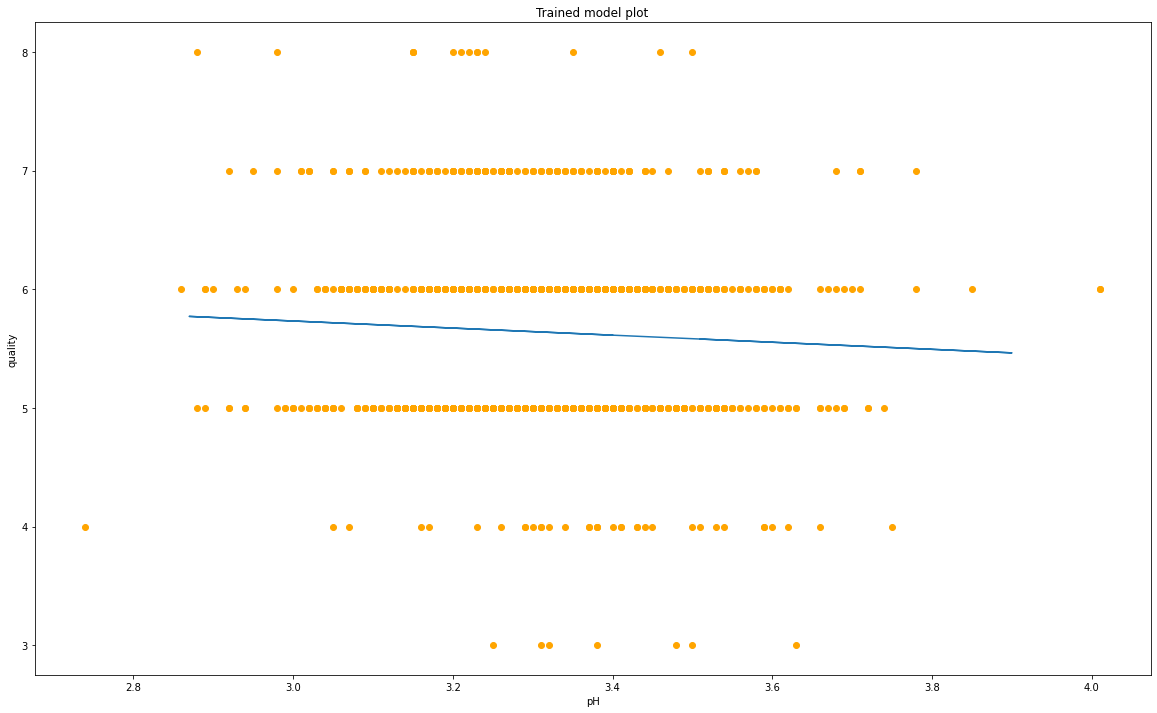

In [32]:
plt.rcParams["figure.figsize"]=[20,12]
plt.scatter(x_train,y_train,color='orange')
plt.plot(x_test,y_predict)
plt.xlabel("pH")
plt.ylabel("quality")
plt.title("Trained model plot")
plt.plot